In [1]:
# This is quantile based individual bins have a specific percent of data  so , we call it as equal frequency or quantile binning

In [2]:
"""
It will handle the outlier
Value spread will be uniform
"""

'\nIt will handle the outlier\nValue spread will be uniform\n'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.load_dataset('titanic')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
df = sns.load_dataset('titanic')

In [6]:
df.fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [8]:
df.fare.quantile(0.1)  # for a first 10% of the data

np.float64(7.55)

In [9]:
df.fare <= df.fare.quantile(0.1)  

0       True
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: fare, Length: 891, dtype: bool

In [11]:
first_10 = df.fare[df.fare <= df.fare.quantile(0.1)]

In [12]:
len(first_10)

92

In [27]:
li = []
first = 0
second = 0
no_of_bins = int(input("Enter the number of bins"))
for i in range(no_of_bins):
    value = df.fare.quantile(i/100)
    second = first
    first = value
    second = first
    li.append(df.fare[(df.fare >= second) & (df.fare <= first)])

Enter the number of bins 10


<Axes: ylabel='Frequency'>

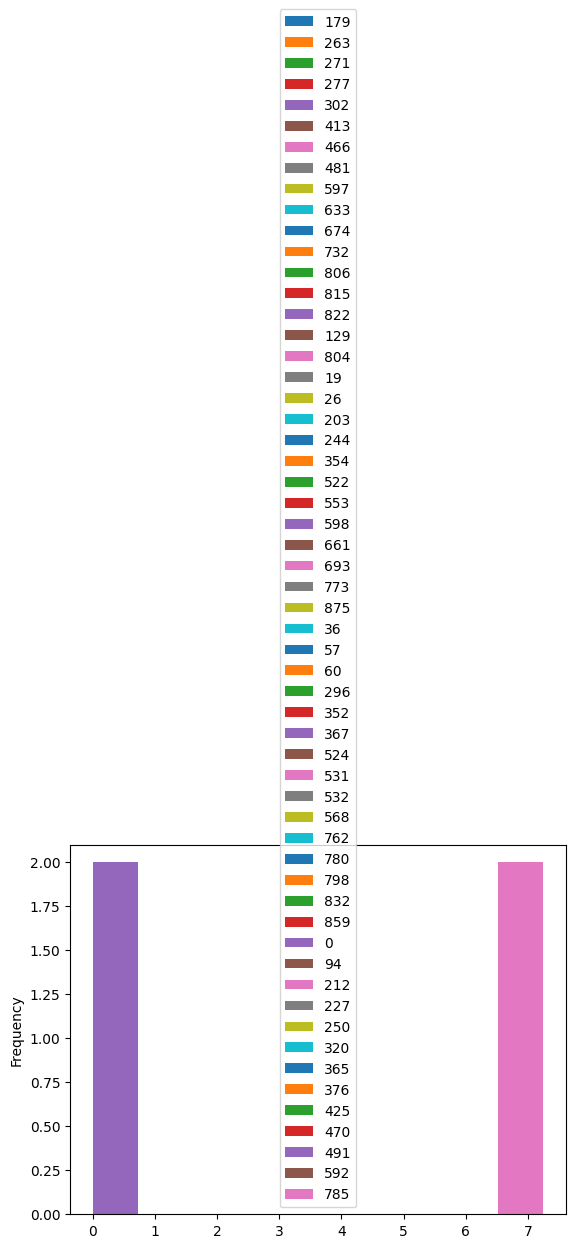

In [35]:
pd.DataFrame(li).plot(kind = 'hist')

In [36]:
# Here we cant plot the graph because values are inside a list of list
li

[179    0.0
 263    0.0
 271    0.0
 277    0.0
 302    0.0
 413    0.0
 466    0.0
 481    0.0
 597    0.0
 633    0.0
 674    0.0
 732    0.0
 806    0.0
 815    0.0
 822    0.0
 Name: fare, dtype: float64,
 179    0.0
 263    0.0
 271    0.0
 277    0.0
 302    0.0
 413    0.0
 466    0.0
 481    0.0
 597    0.0
 633    0.0
 674    0.0
 732    0.0
 806    0.0
 815    0.0
 822    0.0
 Name: fare, dtype: float64,
 Series([], Name: fare, dtype: float64),
 129    6.975
 804    6.975
 Name: fare, dtype: float64,
 Series([], Name: fare, dtype: float64),
 19     7.225
 26     7.225
 203    7.225
 244    7.225
 354    7.225
 522    7.225
 553    7.225
 598    7.225
 661    7.225
 693    7.225
 773    7.225
 875    7.225
 Name: fare, dtype: float64,
 19     7.225
 26     7.225
 203    7.225
 244    7.225
 354    7.225
 522    7.225
 553    7.225
 598    7.225
 661    7.225
 693    7.225
 773    7.225
 875    7.225
 Name: fare, dtype: float64,
 36     7.2292
 57     7.2292
 60     7.2292
 296

<h1>Sklearn Implimentation</h1>

In [37]:
from sklearn.preprocessing import KBinsDiscretizer

In [38]:
nor = 5
binn = KBinsDiscretizer(n_bins=nor, encode='ordinal', strategy='quantile') # by defaule , strategy = 'quantile'

In [40]:
bi = binn.fit_transform(np.array(df.fare).reshape(len(df), 1))

/home/lalithrajr/Machine_learning_Practice/venv/lib/python3.13/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


<Axes: ylabel='Density'>

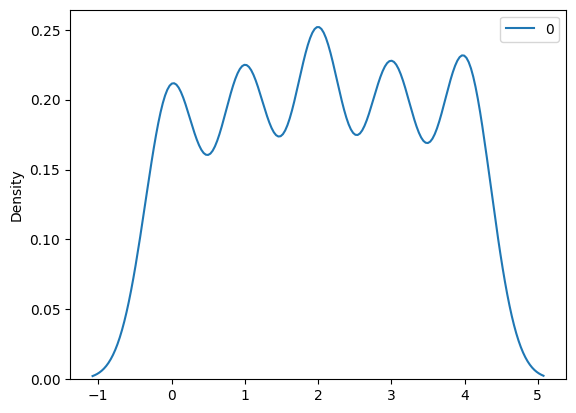

In [44]:
sns.kdeplot(bi)

<Axes: ylabel='Count'>

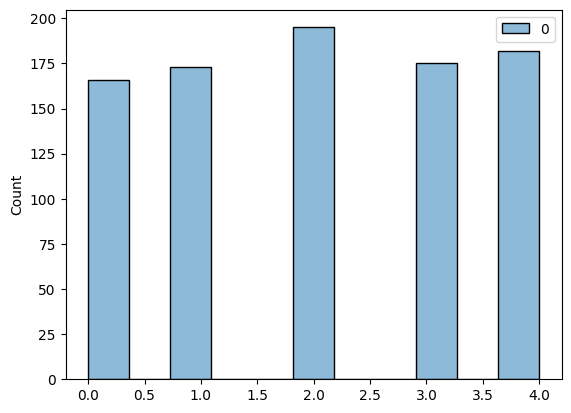

In [45]:
sns.histplot(bi)

<Axes: xlabel='0'>

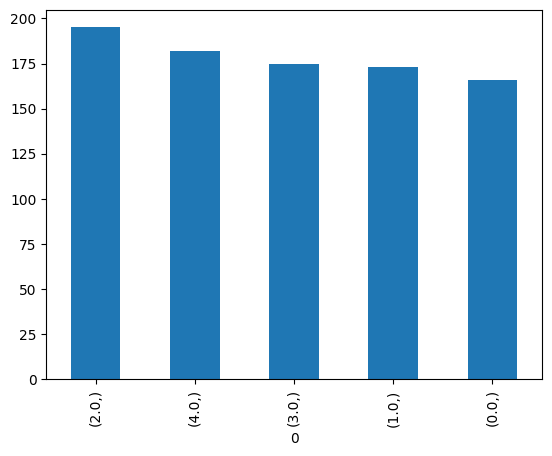

In [49]:
pd.DataFrame(bi).value_counts().plot(kind = 'bar')